In [106]:
import numpy as np

from openfast_toolbox.io import FASTOutputFile  #Make sure you install this tool before running
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
df = pd.read_csv('./Output/linwei_wecsim.csv')
print(df.columns) # 查看所有的列標籤

Index(['time', 'surge', 'heave', 'pitch', 'fair1', 'fair2', 'fair3', 'power',
       'surge_tur', 'heave_tur', 'pitch_tur', 'fair1_tur', 'fair2_tur',
       'fair3_tur', 'power_tur'],
      dtype='object')


In [108]:
#file = FASTOutputFile('IEA-15-240-RWT-UMaineSemi-1.out')
#df = file.toDataFrame()
#print(df.columns[600:])  # 查看所有的列標籤
fileList = ['chen','pinsin','HAO_openfast','HAO_FASTFarm']  ##For openfast .out file
Output_wecsimlist = ['surge', 'heave',  'pitch','fair1',"fair2", "fair3" ,'power']
OutputList= ['PtfmSurge_[m]', 'PtfmHeave_[m]', 'PtfmPitch_[deg]', 'FAIRTEN1_[N]','FAIRTEN2_[N]', 'FAIRTEN3_[N]','GenPwr_[kW]']

In [109]:
#Function for plotting different item (read from Output list)
def plotitem(i):
    for j in range(len(fileList)):  #plot for openfast .out file
        file = FASTOutputFile('./Output/'+fileList[j]+'.out')
        df = file.toDataFrame()
        time  = df['Time_[s]']
        item = df[OutputList[i]]
        plt.plot(time, item, label=fileList[j])

    if i not in {1, 2, 6}:
            df = pd.read_csv('./Output/linwei_wecsim.csv')
            time = df['time']
            item = df[Output_wecsimlist[i]]
            plt.plot(time, item, label='wecsim')
    elif i ==1: #change the setting of heave motion for WEC-sim result
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['heave'] #+ 14.94
        plt.plot(time, item, label='wecsim')
    elif i ==2: #change WEC-sim output pitch[rad] to [deg]
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['pitch'] * 180 / np.pi
        plt.plot(time, item, label='wecsim')
    elif i==6:  #Change WEC-sim output power[MW] to [kW]
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['power'] * 1e3
        plt.plot(time, item, label='wecsim')
    plt.xlabel('Time [s]')
    plt.ylabel(OutputList[i])
    plt.xlim([0,300])
    plt.legend()
    plt.show()
    plt.close()

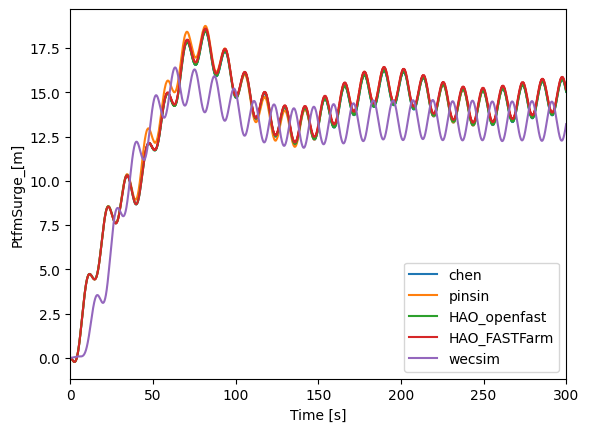

In [110]:
plotitem(0)

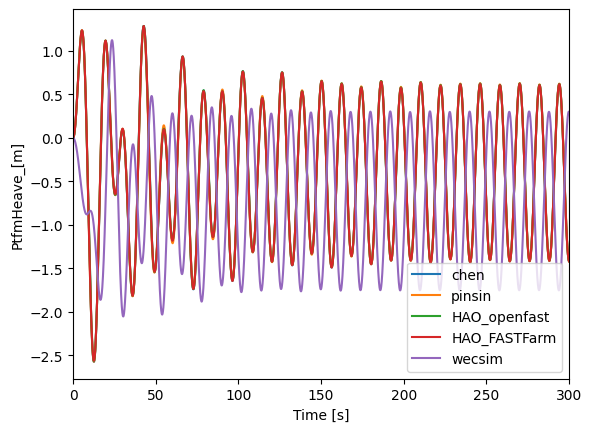

In [111]:
plotitem(1)

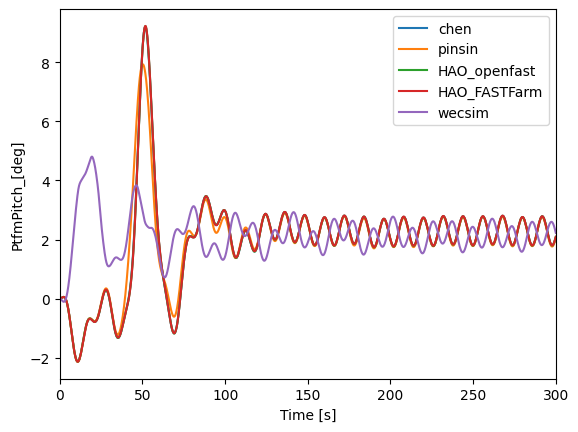

In [112]:
plotitem(2)

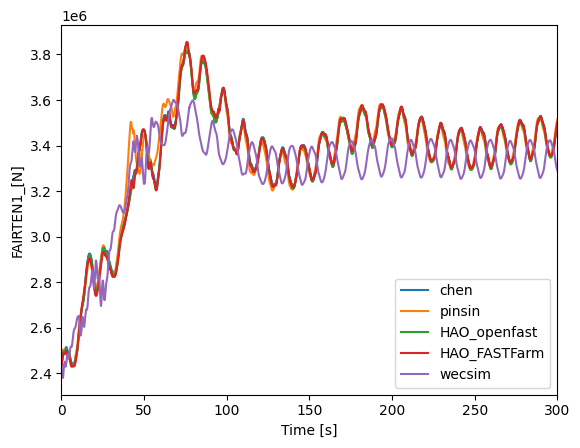

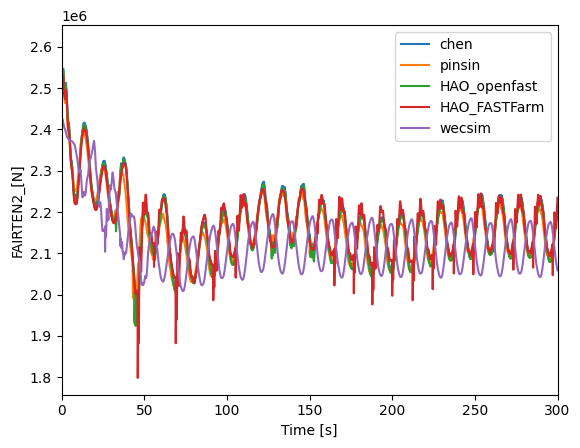

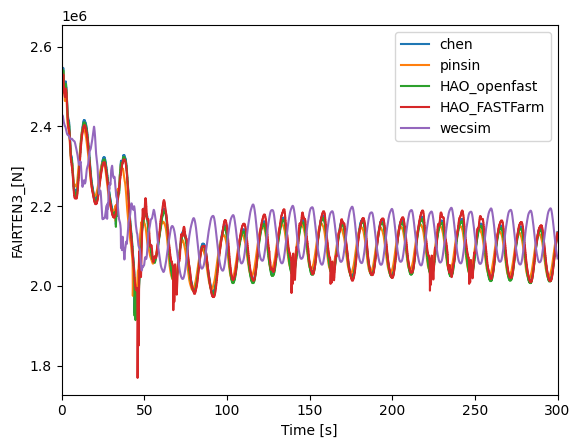

In [113]:
plotitem(3)
plotitem(4)
plotitem(5)

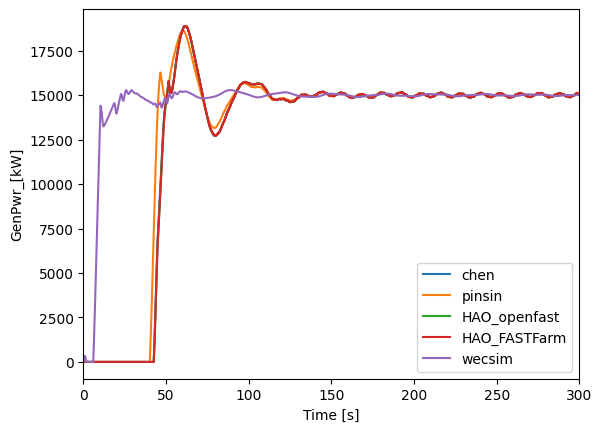

In [114]:
plotitem(6)